In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

warnings.filterwarnings("ignore")


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer


In [9]:
# Load the CSV file
df = pd.read_csv('imdb.csv')

# Extract the text reviews and labels
texts = df['text'].values
labels = df['label'].values

print(f"Total samples: {len(texts)}")


Total samples: 5000


In [11]:
max_length = 250  # Maximum length for each review
num_words = 10000  # Vocabulary size

# Tokenize the text data
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences (integer sequences)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
data = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

print(f"Shape of training data: {train_data.shape}, Shape of test data: {test_data.shape}")


Shape of training data: (4000, 250), Shape of test data: (1000, 250)


In [12]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=num_words, output_dim=32, input_length=max_length),  # Embedding layer
    keras.layers.Conv1D(32, 5, activation='relu'),  # Convolutional layer
    keras.layers.MaxPooling1D(2),  # MaxPooling layer
    keras.layers.LSTM(32, return_sequences=True),  # LSTM layer with return_sequences=True for stacking
    keras.layers.LSTM(32),  # Second LSTM layer
    keras.layers.Dense(32, activation='relu'),  # Fully connected layer
    keras.layers.Dropout(0.5),  # Dropout layer for regularization
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification (positive/negative)
])


In [13]:
# Build the model with a specified input shape
model.build(input_shape=(None, max_length))

# Display the model architecture summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 250, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 246, 32)             │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 123, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 123, 32)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 342,881 (1.31 MB)

 Trainable params: 342,881 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    optimizer='adam',  # Adam optimizer
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model
history = model.fit(
    train_data,  # Training data
    train_labels,  # Training labels
    epochs=5,  # Number of training epochs
    batch_size=64,  # Size of each batch
    validation_data=(test_data, test_labels)  # Validation data for evaluation during training
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.4967 - loss: 0.6937 - val_accuracy: 0.5140 - val_loss: 0.6930
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5285 - loss: 0.6922 - val_accuracy: 0.5610 - val_loss: 0.6822
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6030 - loss: 0.6678 - val_accuracy: 0.5830 - val_loss: 0.6547
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.6795 - loss: 0.5939 - val_accuracy: 0.5580 - val_loss: 0.7389
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.6773 - loss: 0.6147 - val_accuracy: 0.7510 - val_loss: 0.5597


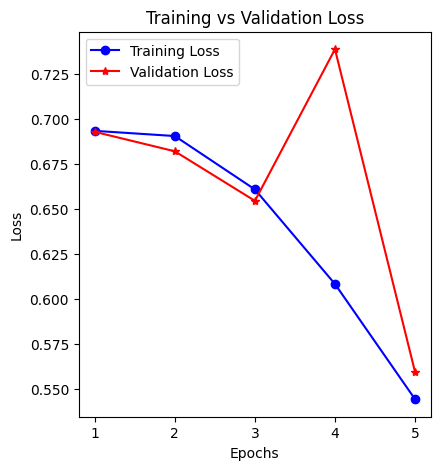

In [15]:
import matplotlib.pyplot as plt

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)  # Create a subplot
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # Training loss
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training vs Validation Loss')  # Title of the plot
plt.legend()  # Display legend
plt.show()  # Show the plot


In [16]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels)

# Print the test accuracy
print(f"Test Accuracy: {test_acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7590 - loss: 0.5506
Test Accuracy: 0.7510


In [17]:
import numpy as np

# Make predictions on the first 5 samples from the test data
predictions = model.predict(test_data[:5])

# Convert predictions to binary (0 or 1)
predictions = (predictions > 0.5).astype(int)

# Print the predictions
print(predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
[[1]
 [0]
 [1]
 [0]
 [1]]


In [18]:
# Print the predicted labels and actual labels for the first 5 samples
print("Predictions:", predictions.flatten())
print("Actual Labels:", test_labels[:5])


Predictions: [1 0 1 0 1]
Actual Labels: [1 1 0 0 1]


In [19]:
# Load the word index for the IMDB dataset
word_index = imdb.get_word_index()


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
def predict_sentiment(review):
    # Preprocess the review: convert to lowercase and split into words
    words = review.lower().split()
    
    # Encode the words using the word_index dictionary
    encoded_review = [word_index.get(word, 2) for word in words]
    
    # Pad the encoded review to match the model's input shape
    padded_review = pad_sequences([encoded_review], maxlen=max_length, padding='post')
    
    # Get the model's prediction
    prediction = model.predict(padded_review)[0][0]
    
    # Determine if the sentiment is positive or negative based on the prediction
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    
    # Print the sentiment and the confidence of the prediction
    print(f"Review Sentiment: {sentiment} (Confidence: {prediction:.4f})")

# Sample reviews
sample_review = "The movie was fantastic and had an amazing storyline"
predict_sentiment(sample_review)

sample_review2 = "The movie was good"
predict_sentiment(sample_review2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Review Sentiment: Positive (Confidence: 0.7656)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Review Sentiment: Positive (Confidence: 0.7656)
